In [15]:
%matplotlib inline


# L1 Penalty and Sparsity in Logistic Regression


In [2]:
import cPickle as pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat

In [6]:
datafolder = os.path.join(os.path.sep, 'home','ans','Dropbox','Zoccolan_strategy_perception_project','data','tidy','full')

X = loadmat(os.path.join(os.path.sep, datafolder, 'X1.mat') )
y = loadmat(os.path.join(os.path.sep, datafolder, 'y1.mat') )
X = X['X']
y = y['y']

X = StandardScaler().fit_transform(X)
y = y.ravel()

Sparsity with L1 penalty: 96.41%


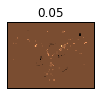

In [16]:
L1 = [0.05]
for i in range(len(L1)):
    
    clf_l1_LR = LogisticRegression(C=L1[i], penalty='l1', tol=0.1)
    clf_l1_LR.fit(X, y)
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    
    l1_plot = plt.subplot(3, 3, i + 1)        
    l1_plot.imshow(coef_l1_LR.reshape(73, 55).T, interpolation='nearest', cmap='copper')    
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    plt.title(str(L1[i]))
    
plt.show()
